# Scalar Fields

The scalar fields class essentially implements class for functions over some $d$-dimensional vector space $\mathbb{R}^d$.  In physics these are scalar fields, which we want to study the dynamics of.  The scalar fields class implements a large suite of useful operations including various methods for approximating derivatives and integrals, computing topological invariants, imposing a dynamics and the algebra of functions.

A scalar field $\phi(x)$ is a function over some $d$-dimensional vector space $\mathbf{X} \subseteq \mathbb{R}^d$, whose points are written as $x \in \mathbf{X}$.  For most practical purposes, it is assumed that the scalar fields we are interested in belong to the subset of smooth functions over $\mathbf{X}$, i.e. $\phi(x) \in \Phi \subseteq C^{\infty}(\mathbf{X})$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# we'll need Matrix, UGrid, and Approximator
from etraj.etraj import Vector, Matrix, UGrid, Approximator, ScalarField
import etraj.etraj as et

## Constructors

In [2]:
# Basic constructor
S = ScalarField()

# summary information
print(S)

++++++++++++++++++++++++++++++++++++++++++++++++++++
<etraj.ScalarField ref at 0x55eec14a4a50>
---------------------------------------------------
<ET::ScalarField<double&> object at 0x7ffcbb7ceb38>
---------------------------------------------------
   name: 'default'
    dim: 0
      N: 0
---------------------------------------------------
UGrid 'default' at: 0x55eec1ceb210,
            ref at: 0x55eec14a4aa8
Approximator at: 0x55eec1b2cf70,
         ref at: 0x55eec14a4ab8
Logger at: 0x55eec1ceb210,
   ref at: 0x55eec14a4ac8
++++++++++++++++++++++++++++++++++++++++++++++++++++


In [3]:
# Constructor with a UGrid
# create a uniformly random one-dimensional grid
# between -5 and 5 with N = 10000 points.
N = 1000
x = np.random.uniform(-2*np.pi,2*np.pi,N)

# next, create the grid of microstates for this 
# set of points.
g = UGrid(x)

S = ScalarField('SField with grid',g)
print(S)

++++++++++++++++++++++++++++++++++++++++++++++++++++
<etraj.ScalarField ref at 0x55eec1ee5420>
---------------------------------------------------
<ET::ScalarField<double&> object at 0x7ffcbb7ceb38>
---------------------------------------------------
   name: 'SField with grid'
    dim: 1
      N: 1000
---------------------------------------------------
UGrid 'default' at: 0x55eec1ee63c0,
            ref at: 0x55eec1ee5478
Approximator at: 0x55eec1ee54f0,
         ref at: 0x55eec1ee5488
Logger at: 0x55eec1ee63c0,
   ref at: 0x55eec1ee5498
++++++++++++++++++++++++++++++++++++++++++++++++++++


In [4]:
# Constructor with UGrid and field values
f = np.cos(x)

S = ScalarField('f(x) = cos(x)',g,f)
print(S)

++++++++++++++++++++++++++++++++++++++++++++++++++++
<etraj.ScalarField ref at 0x55eec14a4a50>
---------------------------------------------------
<ET::ScalarField<double&> object at 0x7ffcbb7ceb38>
---------------------------------------------------
   name: 'f(x) = cos(x)'
    dim: 1
      N: 1000
---------------------------------------------------
UGrid 'default' at: 0x55eec1ceb210,
            ref at: 0x55eec14a4aa8
Approximator at: 0x55eec1b2cf70,
         ref at: 0x55eec14a4ab8
Logger at: 0x55eec1ceb210,
   ref at: 0x55eec14a4ac8
++++++++++++++++++++++++++++++++++++++++++++++++++++


## Attributes for scalar fields

In [5]:
# 

## The algebra of functions

The ScalarField class comes equipped with an assortment of operator overloads.  These include the standard addition and multiplication of two fields, as well as addition and multiplication by scalars.  The following gives some examples of the use of these operators.

Let's first take a look at a set of one-dimensional examples.

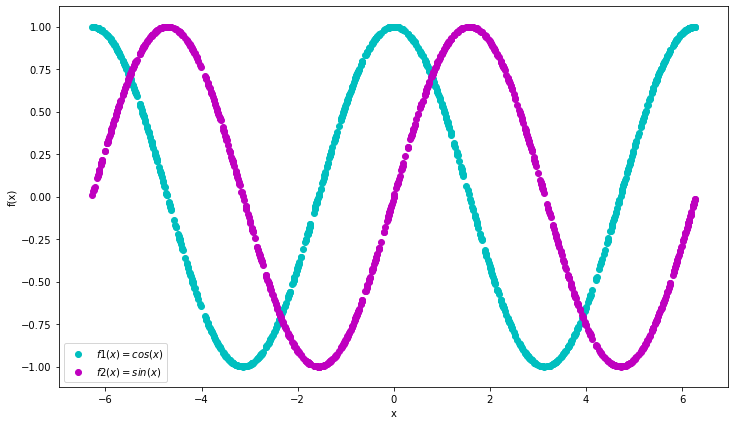

In [6]:
# Adding two scalar fields

# Two scalar fields over the same grid can be added
S1 = ScalarField('cos(x)',g,np.cos(x))
S2 = ScalarField('sin(x)',g,np.sin(x))

f1 = S1.get_field()
f2 = S2.get_field()

# Let's see what these two fields look like
fig,axs = plt.subplots(figsize=(12,7))
axs.scatter(x,f1,color='c',label=r'$f1(x)=cos(x)$')
axs.scatter(x,f2,color='m',label=r'$f2(x)=sin(x)$')
axs.set_xlabel('x')
axs.set_ylabel('f(x)')
plt.legend()
plt.show()

In [7]:
# Now let's add the two fields together
S3 = S1 + S2
print(S3)

++++++++++++++++++++++++++++++++++++++++++++++++++++
<etraj.ScalarField ref at 0x55eec20a97a0>
---------------------------------------------------
<ET::ScalarField<double&> object at 0x7ffcbb7ceb38>
---------------------------------------------------
   name: '(cos(x) + sin(x))'
    dim: 1
      N: 1000
---------------------------------------------------
UGrid 'default' at: 0x55eec1ef7c40,
            ref at: 0x55eec20a97f8
Approximator at: 0x55eec20b4850,
         ref at: 0x55eec20a9808
Logger at: 0x55eec1ef7c40,
   ref at: 0x55eec20a9818
++++++++++++++++++++++++++++++++++++++++++++++++++++


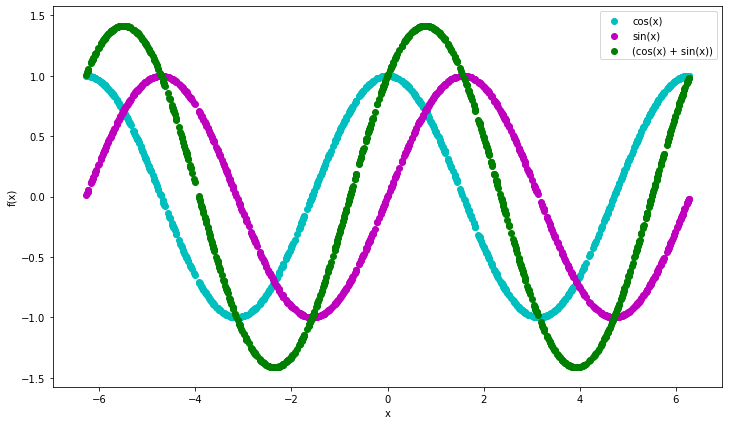

In [8]:
# The result is
f3 = S3.get_field()

fig,axs = plt.subplots(figsize=(12,7))
axs.scatter(x,f1,color='c',label=S1.get_name())
axs.scatter(x,f2,color='m',label=S2.get_name())
axs.scatter(x,f3,color='g',label=S3.get_name())
axs.set_xlabel('x')
axs.set_ylabel('f(x)')
plt.legend()
plt.show()

In [9]:
# While it will not crash the program, manipulating 
# scalar fields with different underlying UGrids will lead
# to a warning and is not advised.
g1 = UGrid(x)
g2 = UGrid(x)

SG1 = ScalarField('SG1',g1,np.cos(x))
SG2 = ScalarField('SG2',g2,np.sin(x))

SG1 += SG2
print(SG1)

++++++++++++++++++++++++++++++++++++++++++++++++++++
<etraj.ScalarField ref at 0x55eec20d8060>
---------------------------------------------------
<ET::ScalarField<double&> object at 0x7ffcbb7ceb38>
---------------------------------------------------
   name: '(SG1 + SG2)'
    dim: 1
      N: 1000
---------------------------------------------------
UGrid 'default' at: 0x55eec20ad390,
            ref at: 0x55eec20d80b8
Approximator at: 0x55eec21bb650,
         ref at: 0x55eec20d80c8
Logger at: 0x55eec20ad390,
   ref at: 0x55eec20d80d8
++++++++++++++++++++++++++++++++++++++++++++++++++++


In [10]:
SG1.output()

[18:28:28] [trace] ET:ScalarField:SG2: Scalar Field 'SG2' created at location 0x55eec20b5300
[18:28:28] [warning] ET:ScalarField:SG1: UGrids for scalar fields SG1 and SG2 do not match



In [11]:
# Subtraction works in the same way
S4 = S1 - S2
print(S4)

++++++++++++++++++++++++++++++++++++++++++++++++++++
<etraj.ScalarField ref at 0x55eec21b3f20>
---------------------------------------------------
<ET::ScalarField<double&> object at 0x7ffcbb7ceb38>
---------------------------------------------------
   name: '(cos(x) - sin(x))'
    dim: 1
      N: 1000
---------------------------------------------------
UGrid 'default' at: 0x55eec1ef7c40,
            ref at: 0x55eec21b3f78
Approximator at: 0x55eec21b77b0,
         ref at: 0x55eec21b3f88
Logger at: 0x55eec1ef7c40,
   ref at: 0x55eec21b3f98
++++++++++++++++++++++++++++++++++++++++++++++++++++


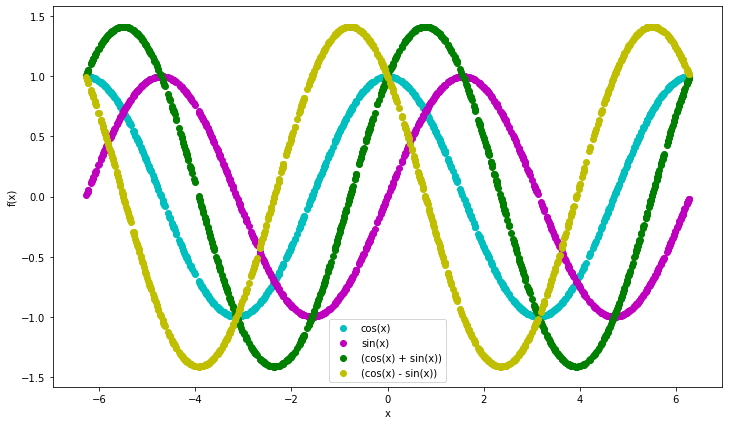

In [12]:
# The result is
f4 = S4.get_field()

fig,axs = plt.subplots(figsize=(12,7))
axs.scatter(x,f1,color='c',label=S1.get_name())
axs.scatter(x,f2,color='m',label=S2.get_name())
axs.scatter(x,f3,color='g',label=S3.get_name())
axs.scatter(x,f4,color='y',label=S4.get_name())
axs.set_xlabel('x')
axs.set_ylabel('f(x)')
plt.legend()
plt.show()

In [13]:
# We can also multiply two scalar fields
S5 = S1 * S2
print(S5)

++++++++++++++++++++++++++++++++++++++++++++++++++++
<etraj.ScalarField ref at 0x55eec20ff550>
---------------------------------------------------
<ET::ScalarField<double&> object at 0x7ffcbb7ceb38>
---------------------------------------------------
   name: '(cos(x) * sin(x))'
    dim: 1
      N: 1000
---------------------------------------------------
UGrid 'default' at: 0x55eec1ef7c40,
            ref at: 0x55eec20ff5a8
Approximator at: 0x55eec21b9060,
         ref at: 0x55eec20ff5b8
Logger at: 0x55eec1ef7c40,
   ref at: 0x55eec20ff5c8
++++++++++++++++++++++++++++++++++++++++++++++++++++


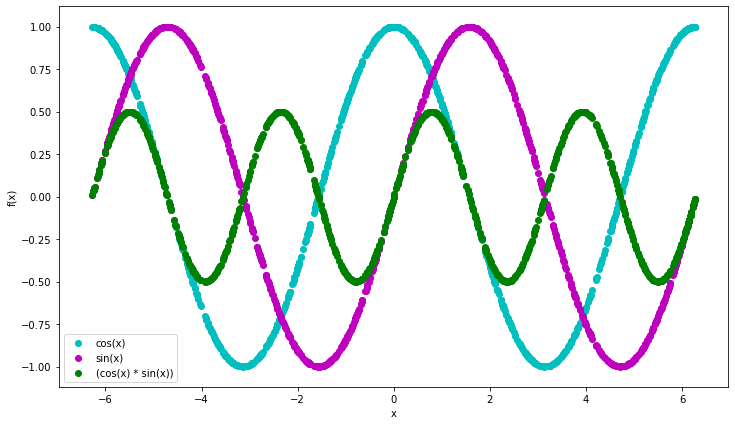

In [14]:
# The result is
f5 = S5.get_field()

fig,axs = plt.subplots(figsize=(12,7))
axs.scatter(x,f1,color='c',label=S1.get_name())
axs.scatter(x,f2,color='m',label=S2.get_name())
axs.scatter(x,f5,color='g',label=S5.get_name())
axs.set_xlabel('x')
axs.set_ylabel('f(x)')
plt.legend()
plt.show()

In [15]:
# We can also divide two scalar fields whenever
# their functional form does not cross f(x) = 0.
x = np.random.uniform(0,1,N)
g = UGrid(x)

SD1 = ScalarField('2.0',g,[2.0 for i in range(len(x))])
SD2 = ScalarField('exp(x)',g,np.exp(x))
SD3 = SD1 / SD2
print(SD3)

++++++++++++++++++++++++++++++++++++++++++++++++++++
<etraj.ScalarField ref at 0x55eec20b50f0>
---------------------------------------------------
<ET::ScalarField<double&> object at 0x7ffcbb7ceb38>
---------------------------------------------------
   name: '(2.0 / exp(x))'
    dim: 1
      N: 1000
---------------------------------------------------
UGrid 'default' at: 0x55eec259a2b0,
            ref at: 0x55eec20b5148
Approximator at: 0x55eec25a3fc0,
         ref at: 0x55eec20b5158
Logger at: 0x55eec259a2b0,
   ref at: 0x55eec20b5168
++++++++++++++++++++++++++++++++++++++++++++++++++++


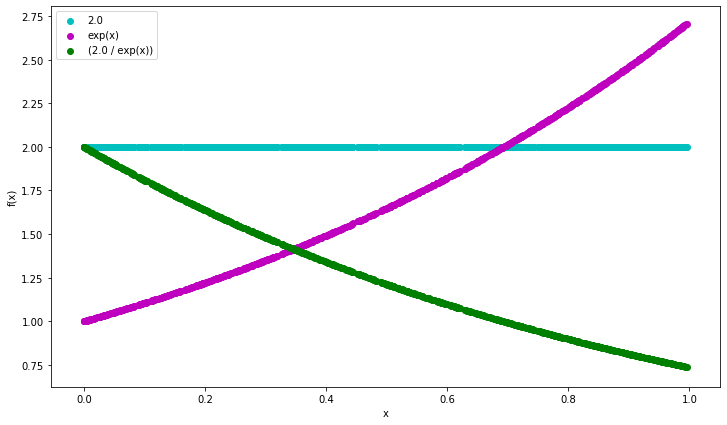

In [16]:
# The result is
fd1 = SD1.get_field()
fd2 = SD2.get_field()
fd3 = SD3.get_field()

fig,axs = plt.subplots(figsize=(12,7))
axs.scatter(x,fd1,color='c',label=SD1.get_name())
axs.scatter(x,fd2,color='m',label=SD2.get_name())
axs.scatter(x,fd3,color='g',label=SD3.get_name())
axs.set_xlabel('x')
axs.set_ylabel('f(x)')
plt.legend()
plt.show()

## Calculus over scalar fields